In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weight-height.csv");df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [3]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [4]:
df.describe(include='all')

,Gender,Height,Weight
count,8555,8555.000000,8555.000000
unique,2,NaN,NaN
top,Male,NaN,NaN
freq,5000,NaN,NaN
mean,NaN,66.809925,165.632735
std,NaN,3.851454,32.043922
min,NaN,54.616858,65.780000
25%,NaN,63.957684,139.876803
50%,NaN,66.985923,168.521567
75%,NaN,69.604427,190.666305


In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le = LabelEncoder()

In [7]:
df.Gender = le.fit_transform(df.Gender);df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = df.drop(['Weight'],axis=1).values;y = df['Weight'].values

In [10]:
print(x)

[[ 1.         73.84701702]
 [ 1.         68.78190405]
 [ 1.         74.11010539]
 ...
 [ 0.         65.58405676]
 [ 0.         67.42997138]
 [ 0.         60.92179087]]


In [11]:
xtrain,xtest, ytrain,ytest = train_test_split(x,y,train_size=.7,random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
ml = LinearRegression()
ml.fit(xtrain,ytrain)

LinearRegression()

In [13]:
ml_pred = ml.predict(xtest)
print(ml_pred)

[142.44868114 186.0517281  198.42283706 ... 102.94080643 190.83713617
 143.34786753]


In [14]:
from sklearn.metrics import  r2_score,mean_squared_error

In [15]:
r2_score(ytest,ml_pred)

0.9059112424422664

In [16]:
mean_squared_error(ytest,ml_pred)

96.83734437830556

# Knn Regressor

In [17]:
x_train,x_test, y_train,y_test = train_test_split(df.drop(['Weight'],axis=1),df['Weight'],train_size=.70,random_state=42)

In [18]:
x_train

,Gender,Height
553,1,67.594031
1397,1,71.601697
7934,0,62.625985
8367,0,66.136131
3320,1,71.843308
...,...,...
5734,0,63.349988
5191,0,58.861625
5390,0,64.325406
860,1,69.074492


In [19]:
from sklearn.neighbors import KNeighborsRegressor
knnr =  KNeighborsRegressor()

In [20]:
knnr.fit(x_train,y_train)

KNeighborsRegressor()

In [21]:
knr_pred = knnr.predict(x_test);print(knr_pred)

[142.1445657  181.38276924 187.07075266 ... 101.79654426 192.43702356
 145.3632227 ]


In [22]:
before = r2_score(y_test,knr_pred);before

0.8821086423439015

In [23]:
mean_squared_error(y_test,knr_pred)

121.33528273624482

# max_depth

In [24]:
def absoluteError(x_t,y_t,modelInput):
    predict = modelInput.predict(x_t)
    errors = y_t-predict
    return sum(abs(errors))


In [25]:
from sklearn.ensemble import RandomForestRegressor

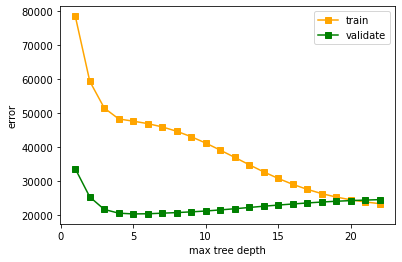

In [26]:
err = []
errIndex = []
errTest = []
for treedepth in range(1,23):
    clf = RandomForestRegressor(random_state=2345,max_depth=treedepth)
    model = clf.fit(x_train,y_train)
    err.append(absoluteError(x_train,y_train,model))
    errTest.append(absoluteError(x_test,y_test,model))
    errIndex.append(treedepth)

fig, ax = plt.subplots()
ax.plot(errIndex,err,'rs-', color="orange",linewidth=1.5)
ax.plot(errIndex,errTest,'rs-', color='green',linewidth=1.5)
ax.set_xlabel("max tree depth")
ax.set_ylabel("error")
plt.legend(['train','validate'])

# min leaf

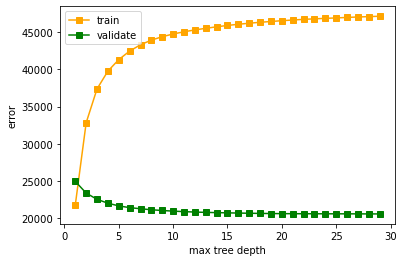

In [27]:
err = []
errIndex = []
errTest = []
for leaf in range(1,30):
    clf = RandomForestRegressor(random_state=2345,min_samples_leaf=leaf)
    model = clf.fit(x_train,y_train)
    err.append(absoluteError(x_train,y_train,model))
    errTest.append(absoluteError(x_test,y_test,model))
    errIndex.append(leaf)

fig, ax = plt.subplots()
ax.plot(errIndex,err,'rs-', color="orange",linewidth=1.5)
ax.plot(errIndex,errTest,'rs-', color='green',linewidth=1.5)
ax.set_xlabel("max tree depth")
ax.set_ylabel("error")
plt.legend(['train','validate'])

In [28]:
grids = {
    'n_estimators': [int(x) for x in np.linspace(1,30)],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[5],
    'min_samples_split': [2,3,4],
    'min_samples_leaf': [20],
    'criterion':['squared_error','absolute_error','poisson']
}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
rfr = RandomForestRegressor()

In [32]:
rmcv = RandomizedSearchCV(estimator=rfr, param_distributions=grids,error_score='raise')

In [33]:
rmcv

RandomizedSearchCV(error_score='raise', estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [20],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [1, 1, 2, 2, 3, 3, 4, 5,
                                                         5, 6, 6, 7, 8, 8, 9, 9,
                                                         10, 11, 11, 12, 12, 13,
                                                         14, 14, 15, 15, 16, 16,
                                                         

In [34]:
rmcv.fit(x_train,y_train)

RandomizedSearchCV(error_score='raise', estimator=RandomForestRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [5],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [20],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': [1, 1, 2, 2, 3, 3, 4, 5,
                                                         5, 6, 6, 7, 8, 8, 9, 9,
                                                         10, 11, 11, 12, 12, 13,
                                                         14, 14, 15, 15, 16, 16,
                                                         

In [35]:
rmcv.best_params_

{'n_estimators': 18,
 'min_samples_split': 4,
 'min_samples_leaf': 20,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'squared_error'}

In [43]:
knn = KNeighborsRegressor(n_neighbors=18)

In [44]:
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=18)

In [45]:
knn_pred2=knn.predict(x_test)

In [46]:
after=r2_score(y_test,knn_pred2);after

0.9000167595478338

In [47]:
mean_squared_error(ytest,knn_pred2)

102.90402104400555

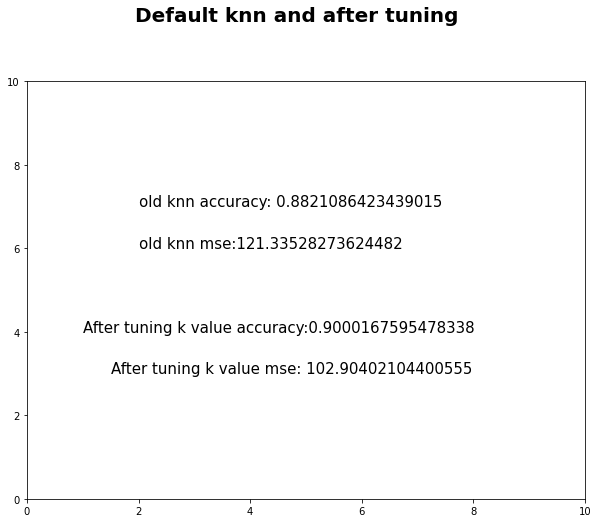

In [59]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)
fig.suptitle('Default knn and after tuning', fontsize=20, fontweight='bold')
ax.axis([0, 10, 0, 10])

ax.text(2, 7, "old knn accuracy: {}".format(before), fontsize=15)
ax.text(2, 6, "old knn mse:{}".format(mean_squared_error(y_test,knr_pred)), fontsize=15)
ax.text(1., 4, "After tuning k value accuracy:{}".format(r2_score(y_test,knn_pred2)), fontsize=15)
ax.text(1.5, 3, "After tuning k value mse: {}".format(mean_squared_error(ytest,knn_pred2)), fontsize=15)
plt.show()

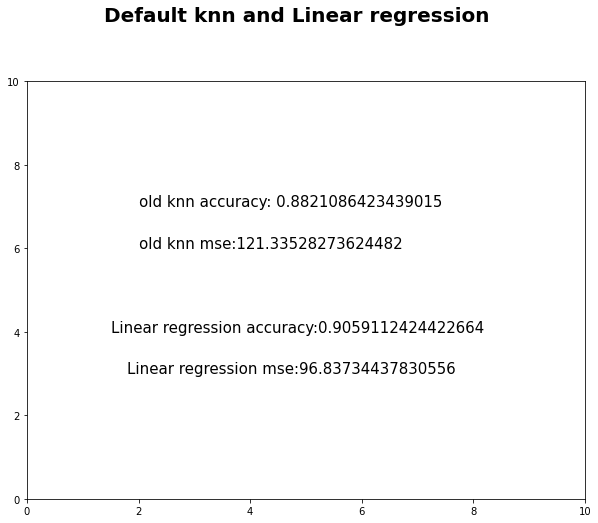

In [60]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot()
fig.subplots_adjust(top=0.85)
fig.suptitle('Default knn and Linear regression', fontsize=20, fontweight='bold')
ax.axis([0, 10, 0, 10])

ax.text(2, 7, "old knn accuracy: {}".format(before), fontsize=15)
ax.text(2, 6, "old knn mse:{}".format(mean_squared_error(y_test,knr_pred)), fontsize=15)
ax.text(1.5, 4, "Linear regression accuracy:{}".format(r2_score(ytest,ml_pred)), fontsize=15)
ax.text(1.8, 3, "Linear regression mse:{}".format(mean_squared_error(ytest,ml_pred)), fontsize=15)
plt.show()